In [1]:
from graph_utils import *

/home/mbugueno/anaconda3/envs/py38_torch111/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def mapping_object(data, dataframe, original, ide):   
    tokens=dataframe['node_features'][ide][1:-1].split(", ")
    tokens=[term[1:-1] for term in tokens]
    print('=============================================================')
    print ("\nOriginal text:\n", np.asarray(original)[ide]) #id_data
    print(data)
    print('=============================================================')

    # Gather some statistics about the first graph.
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    print(f'Has self-loops: {data.has_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')
    mapping=dict(zip(range(len(tokens)), tokens))
    
    return mapping

### Types of graphs:

* A - simple window graph
* A2 - extended window graph
* C - sequential graph with weights on edges
* C2 - simplified sequential graph. Without weights on edges

In [3]:
def visualize_graph_samples(name_dataset, num_samples, prepro, gtype='1.A'): 
    weighted=False
    
    dict_gtype={'1.A':'A', '1.A2':'A2', '1.C':'C', '1.C2':'C2'}
    if name_dataset=='app_reviews':
        columns=['review','star']
        text='review'
        path='data_app' 
        name='app_reviews'
        file="App_graphs_"
        n_classes=5
        data = load_dataset(name_dataset)
    if name_dataset=='dbpedia_14':
        columns=['title','content','label']
        text='content'
        path='data_db'
        name='dbpedia_14'
        file="DB_graphs_"
        n_classes=14
        data = load_dataset(name_dataset)
    if name_dataset=='imdb':
        columns=['text','label']
        text='text'
        name='imdb'
        path='data_imdb'
        file="IMDB_graphs_"
        n_classes=2
        data = load_dataset(name_dataset)
    ######    
    if name_dataset=='bbc':
        columns=['text','label']
        text='text'
        path='data_bbc'
        name='bbc'
        file="BBC_graphs_"
        n_classes=5
    if name_dataset=='hyper':
        columns=['text','label']
        text='text'
        name='hyperpartisan_news_detection'
        path='data_hyperpartisan_news_detection'
        file="Hyper_graphs_"
        n_classes=2        
        data = load_dataset(name, 'byarticle')
    if gtype=="1.A" or gtype=="1.A2":
        undirected=True
    else:
        undirected=False
    
    if gtype=='1.C':
        weighted=True
    if prepro=='soft':
        path=path+"_prep"
    file=file + dict_gtype[gtype]
    #change path: where you saved your graphs 
    original=pd.read_csv("/scratch1/datasets/TC_graphs/Data_RBased/"+name+"/"+prepro+"/source_processed.csv")
    datass= MyGraphDataset(root="/scratch1/datasets/TC_graphs/Data_Graphs/"+path+"/"+gtype+"/", filename=file)
    datass.num_classes = n_classes
    dataframe=pd.read_csv("/scratch1/datasets/TC_graphs/Data_Graphs/"+path+"/"+gtype+"/raw/"+file+".csv")
    lenn=len(datass)
    
    print(f'Dataset: {name_dataset}:')
    print('====================')
    print(f'Number of graphs: {lenn}')
    print(f'Number of node features: {datass.num_features}')
    print(f'Number of edge features: {datass.num_edge_features}')
    print(f'Number of classes: {datass.num_classes}')

    cont=0
    while (cont<num_samples):
        ide=np.random.randint(lenn)
        data = datass[ide] 
        if data.x.shape[0]<5:
            continue
        else:
            cont+=1
            mapping=mapping_object(data, dataframe, original['content'], ide) 
            G = to_networkx(data, to_undirected=undirected) 
            if weighted:
                attrs=dataframe['edges_attr'][ide][1:-1].split(", ")
                attrs=[int(w) for w in attrs]
                ori_edges = G.edges()
                new_edges=[(tupla[0], tupla[1], att) for tupla,att in zip(ori_edges,attrs)]

                G2=nx.DiGraph()
                G2.add_weighted_edges_from(new_edges) 
                visualize_graph(G2, color='yellow',mapping=mapping, edge_labels=True)
            else:
                visualize_graph(G, color='yellow', mapping=mapping)
        

#### App Reviews


Using custom data configuration default
Reusing dataset app_reviews (/home/mbugueno/.cache/huggingface/datasets/app_reviews/default/0.0.0/20335b51b604b9bc04b7be253cd8445caa9ba93f15f39a4b0492b9e9102853de)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 360.92it/s]


Dataset: app_reviews:
Number of graphs: 6971
Number of node features: 768
Number of edge features: 0
Number of classes: 5

Original text:
 latest update stable loads older messages shows notification even read also received messages missing sender delete course thanks calling update
Data(x=[18, 768], edge_index=[2, 38], y=[1])
Number of nodes: 18
Number of edges: 38
Average node degree: 2.11
Has isolated nodes: False
Has self-loops: False
Is undirected: True


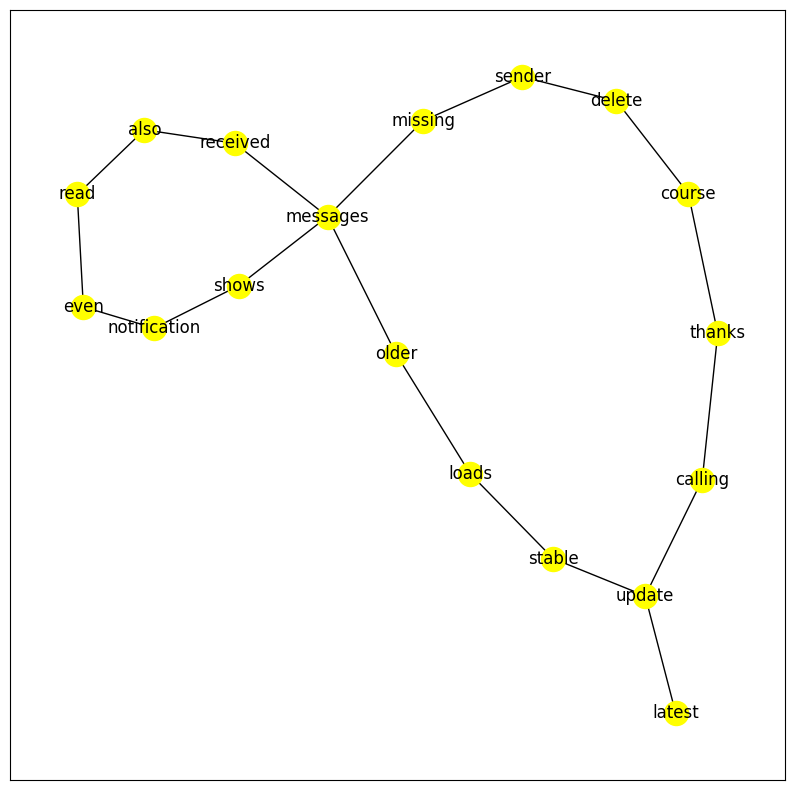


Original text:
 bugs nothin worked great galaxy s4 loved
Data(x=[7, 768], edge_index=[2, 12], y=[1])
Number of nodes: 7
Number of edges: 12
Average node degree: 1.71
Has isolated nodes: False
Has self-loops: False
Is undirected: True


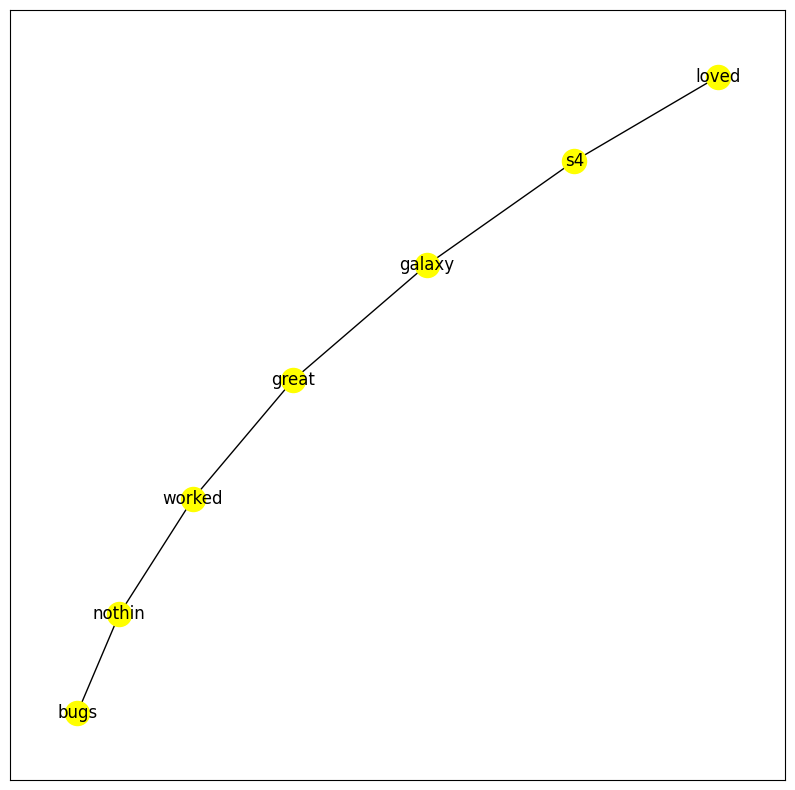


Original text:
 outstanding best podcast manager available
Data(x=[5, 768], edge_index=[2, 8], y=[1])
Number of nodes: 5
Number of edges: 8
Average node degree: 1.60
Has isolated nodes: False
Has self-loops: False
Is undirected: True


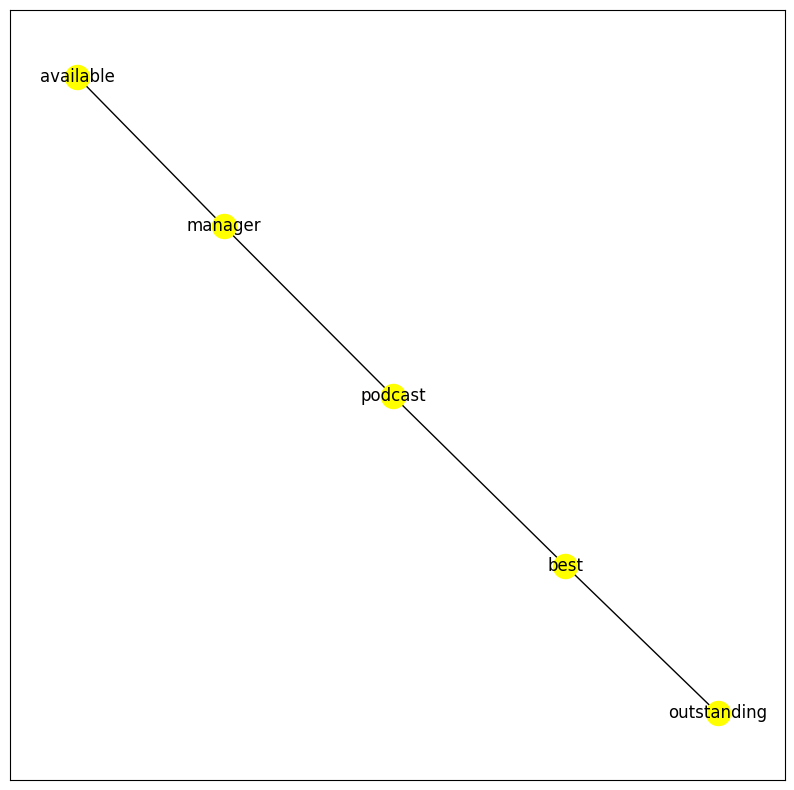

In [18]:
visualize_graph_samples("app_reviews",3, "soft", gtype='1.A')

Using custom data configuration default
Reusing dataset app_reviews (/home/mbugueno/.cache/huggingface/datasets/app_reviews/default/0.0.0/20335b51b604b9bc04b7be253cd8445caa9ba93f15f39a4b0492b9e9102853de)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 290.08it/s]


Dataset: app_reviews:
Number of graphs: 6971
Number of node features: 768
Number of edge features: 0
Number of classes: 5

Original text:
 desperately needs rework cant even open either kdb kdbx file fron onedrive tjey never show avaialable please fix happy assist trial solution
Data(x=[22, 768], edge_index=[2, 82], y=[1])
Number of nodes: 22
Number of edges: 82
Average node degree: 3.73
Has isolated nodes: False
Has self-loops: False
Is undirected: True


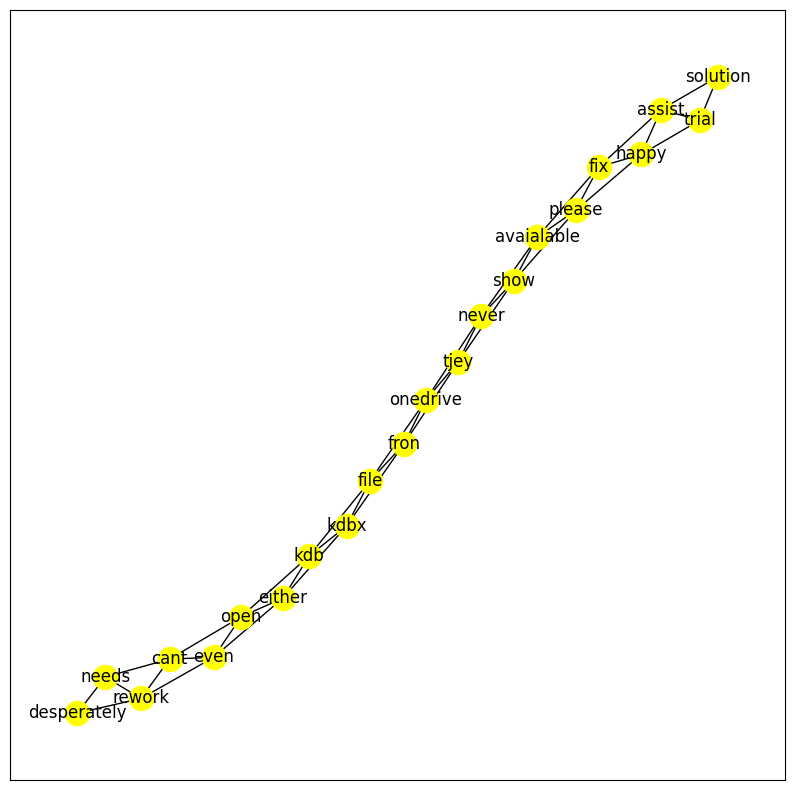


Original text:
 favourite android game yes hard life game encapsulates middle finger attitude many new school easy mode hold hand baby gamers long since either forgotten never experienced game true challenge frustrating yes unfair certainly fun oh hell yes game makes cry rage makes good runs better balanced without much grinding sturnly puts gamer place moment dare get cocky 5
Data(x=[52, 768], edge_index=[2, 218], y=[1])
Number of nodes: 52
Number of edges: 218
Average node degree: 4.19
Has isolated nodes: False
Has self-loops: False
Is undirected: True


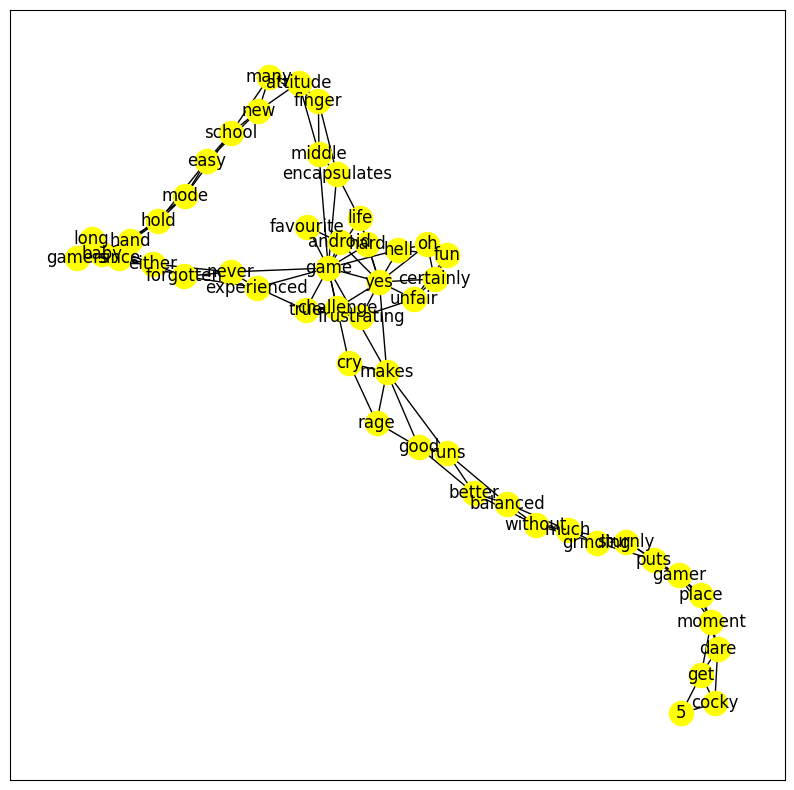


Original text:
 constant app always connect even knows network near remembered
Data(x=[9, 768], edge_index=[2, 30], y=[1])
Number of nodes: 9
Number of edges: 30
Average node degree: 3.33
Has isolated nodes: False
Has self-loops: False
Is undirected: True


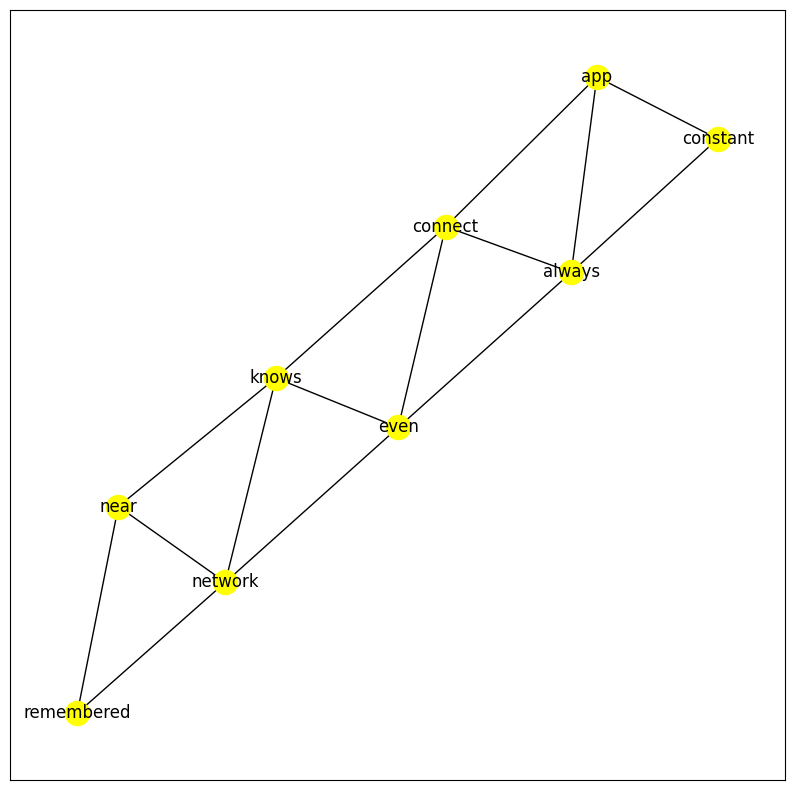

In [17]:
visualize_graph_samples("app_reviews",3, "soft", gtype='1.A2')

Using custom data configuration default
Reusing dataset app_reviews (/home/mbugueno/.cache/huggingface/datasets/app_reviews/default/0.0.0/20335b51b604b9bc04b7be253cd8445caa9ba93f15f39a4b0492b9e9102853de)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 249.28it/s]


Dataset: app_reviews:
Number of graphs: 6971
Number of node features: 768
Number of edge features: 1
Number of classes: 5

Original text:
 love hi darbhanga city man
Data(x=[5, 768], edge_index=[2, 4], edge_attr=[4], y=[1])
Number of nodes: 5
Number of edges: 4
Average node degree: 0.80
Has isolated nodes: False
Has self-loops: False
Is undirected: False


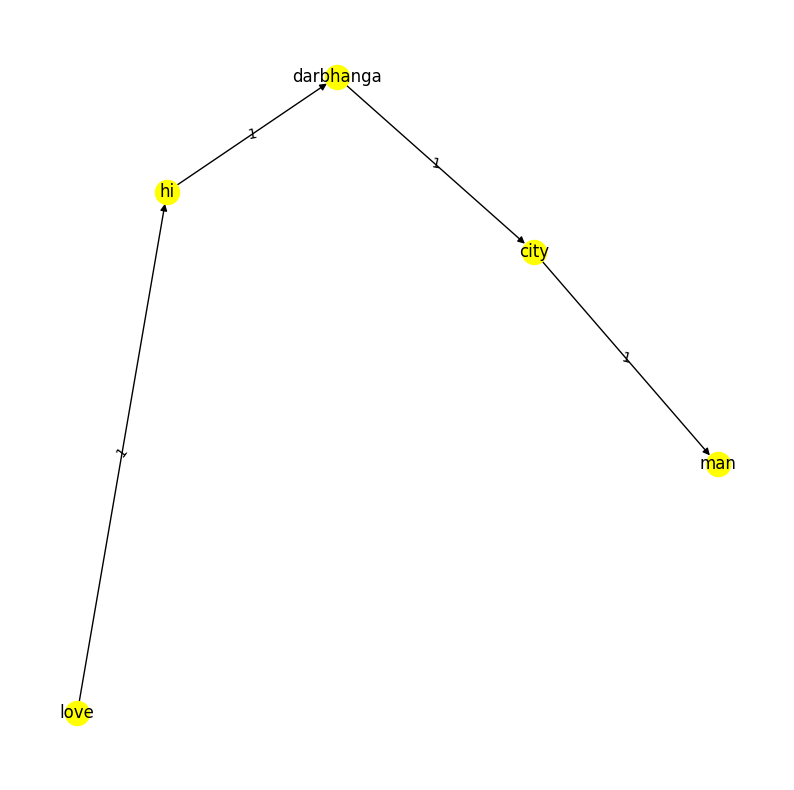


Original text:
 takes much space mobile memory
Data(x=[5, 768], edge_index=[2, 4], edge_attr=[4], y=[1])
Number of nodes: 5
Number of edges: 4
Average node degree: 0.80
Has isolated nodes: False
Has self-loops: False
Is undirected: False


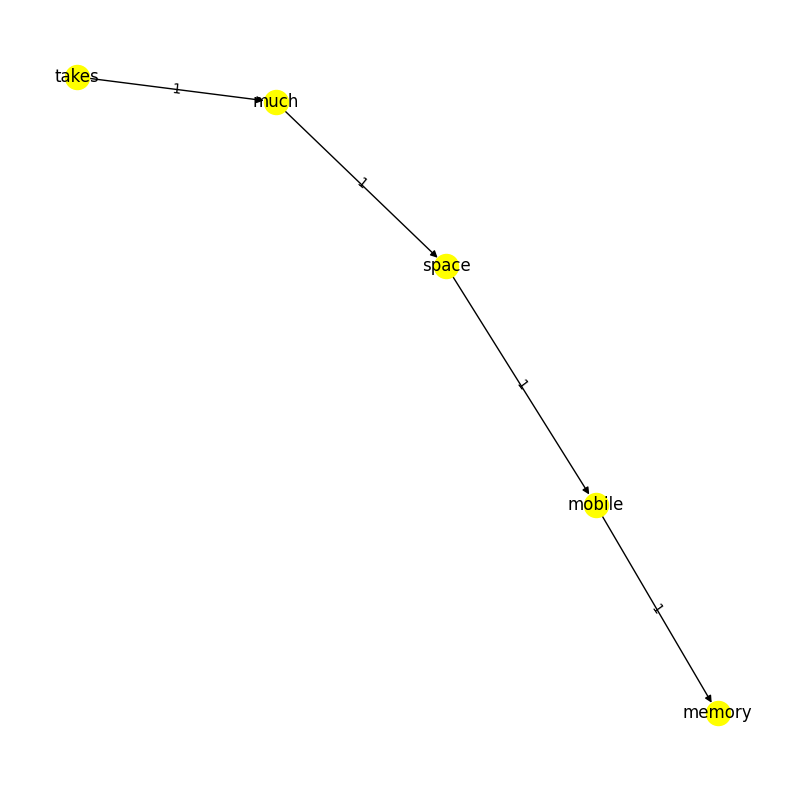


Original text:
 useful app useful identify abnormal battery usage
Data(x=[6, 768], edge_index=[2, 6], edge_attr=[6], y=[1])
Number of nodes: 6
Number of edges: 6
Average node degree: 1.00
Has isolated nodes: False
Has self-loops: False
Is undirected: False


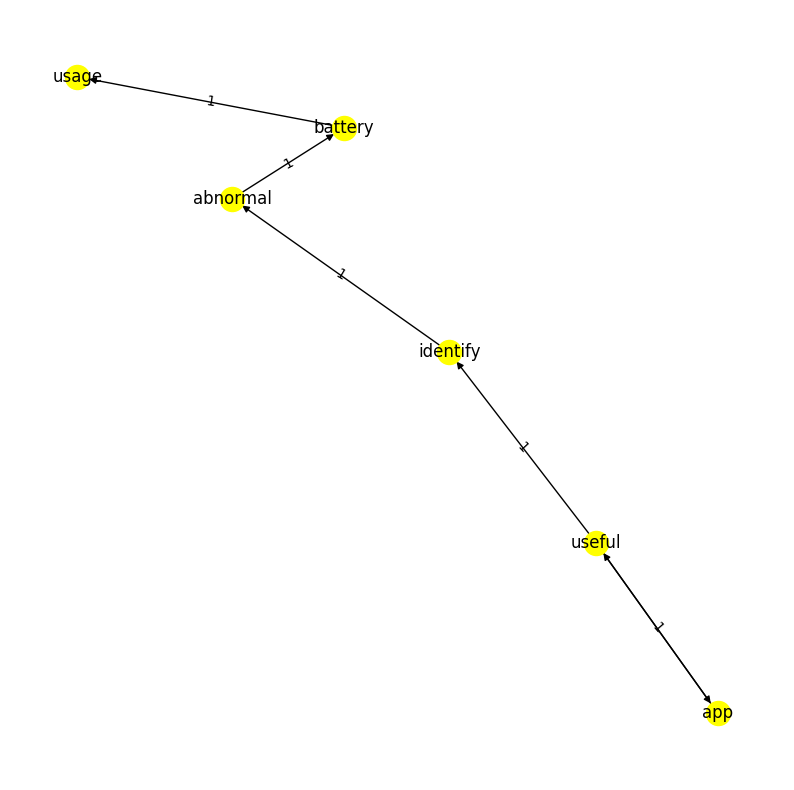

In [16]:
visualize_graph_samples("app_reviews",3, "soft", gtype='1.C')

Using custom data configuration default
Reusing dataset app_reviews (/home/mbugueno/.cache/huggingface/datasets/app_reviews/default/0.0.0/20335b51b604b9bc04b7be253cd8445caa9ba93f15f39a4b0492b9e9102853de)
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.45it/s]


Dataset: app_reviews:
Number of graphs: 6971
Number of node features: 768
Number of edge features: 0
Number of classes: 5

Original text:
 app fast delay open irritating
Data(x=[5, 768], edge_index=[2, 4], y=[1])
Number of nodes: 5
Number of edges: 4
Average node degree: 0.80
Has isolated nodes: False
Has self-loops: False
Is undirected: False


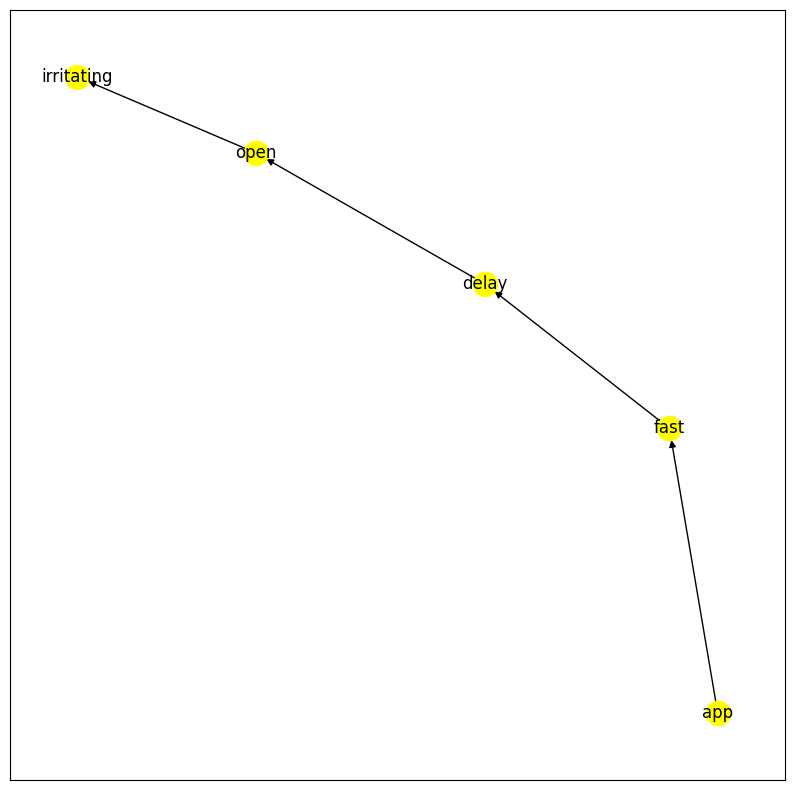


Original text:
 unusable cant play game without uncompressing freaking file please make play dragon ball z shin budokai another road downloading game
Data(x=[18, 768], edge_index=[2, 19], y=[1])
Number of nodes: 18
Number of edges: 19
Average node degree: 1.06
Has isolated nodes: False
Has self-loops: False
Is undirected: False


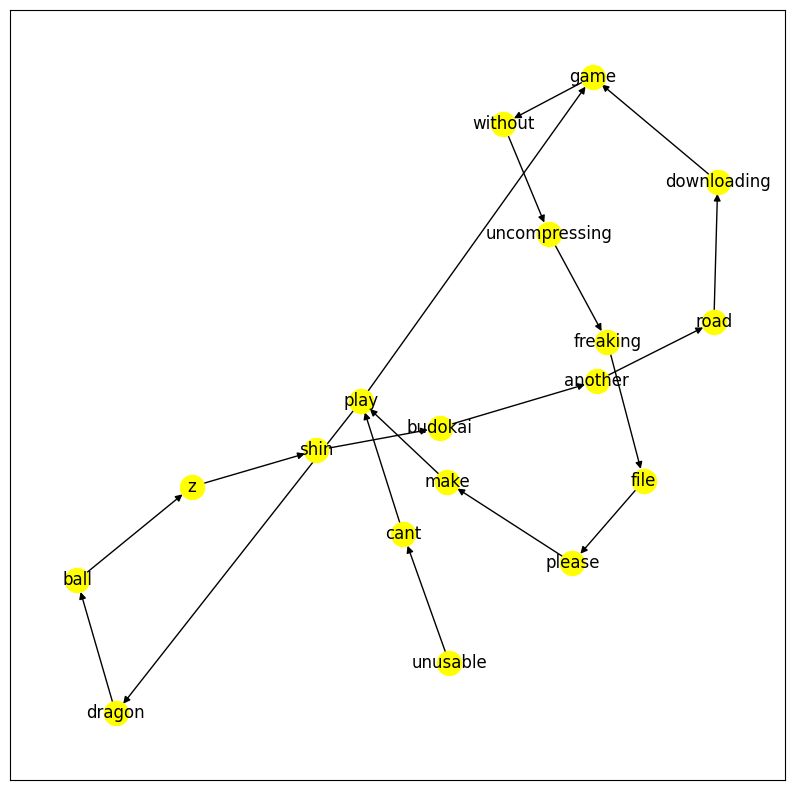


Original text:
 contents much articles really want tk thanks wikipedia foundation help us students aquire vast knowledge wikipedia big encyclopedia help us good friend
Data(x=[19, 768], edge_index=[2, 20], y=[1])
Number of nodes: 19
Number of edges: 20
Average node degree: 1.05
Has isolated nodes: False
Has self-loops: False
Is undirected: False


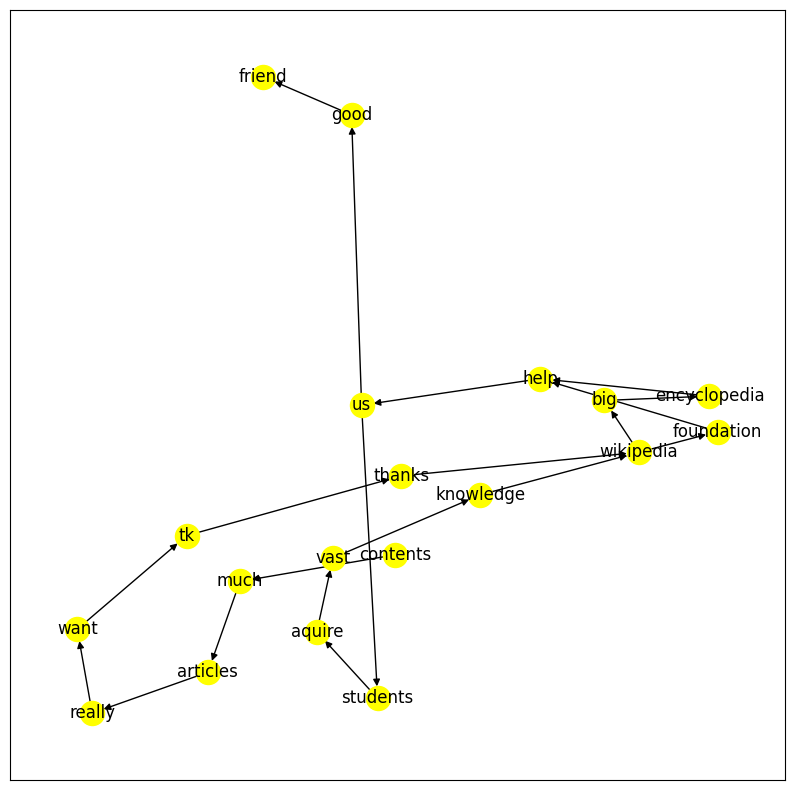

In [15]:
visualize_graph_samples("app_reviews",3, "soft", gtype='1.C2')

#### Hyperpartisan news detection

Reusing dataset hyperpartisan_news_detection (/home/mbugueno/.cache/huggingface/datasets/hyperpartisan_news_detection/byarticle/1.0.0/7f4215b0474950ddf516e806400ab81d098b3da3b3a919a13cd1a4cf2c677012)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 509.02it/s]


Dataset: hyper:
Number of graphs: 516
Number of node features: 768
Number of edge features: 0
Number of classes: 2

Original text:
 p gmg question going asked many times many people global warming cause impact hurricane irma harvey p p tremendous agreement among scientists basic science climate change politics social media created atmosphere lot incorrect information bantered p p truth relationship global warming hurricanes irma harvey p p scientists uncertain whether global warming cause hurricanes p p fact scientists say warmer planet actually result fewer hurricanes however entire story p p warming world means ocean temperatures increase know warm ocean water fuel power hurricanes even coming decades show decrease overall hurricanes hurricanes develop otherwise favorable conditions likely stronger p p bottom line future may one fewer stronger hurricanes good bad news fewer hurricanes mean lower chance one hits florida hurricane form heads way likely stronger severe storm surge highe

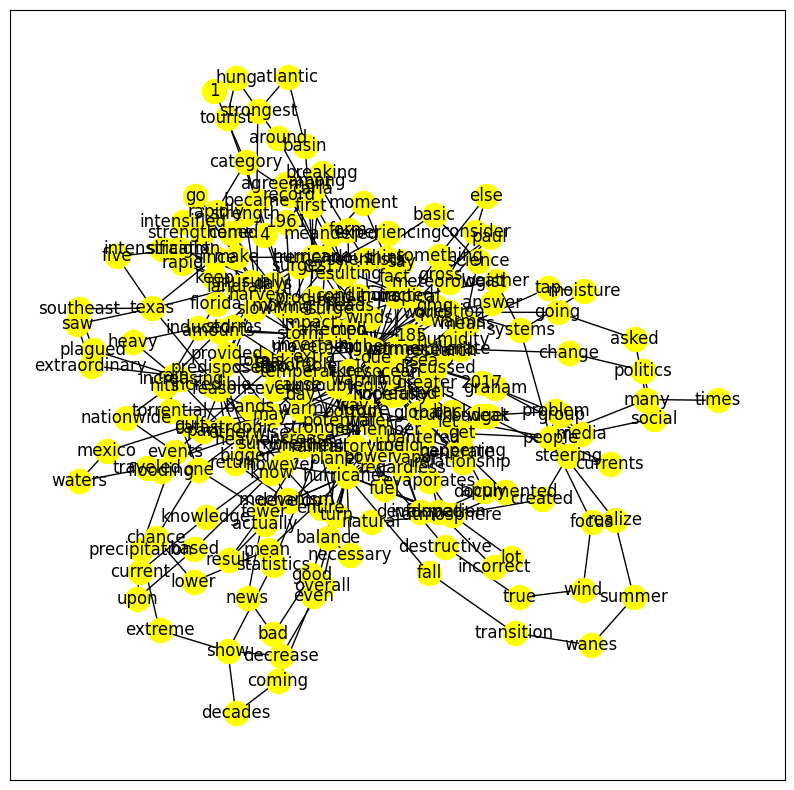


Original text:
 href http video foxnews com v 5669803910001 lawmakers demand probe special treatment clinton type external p hillary clinton called monica lewinsky 8220 narcissistic loony tune 8221 called gennifer flowers 8220 failed cabaret singer 8221 said republicans congress organized 8220 vast right wing conspiracy 8221 husband president bill clinton p p former secretary state defeated democratic presidential candidate says us still interested investigating conduct engaging 8220 abuse power 8221 p p hillary clinton expects special treatment always real question fbi give p p fbi 8217 investigation hillary clinton referred 8220 special 8221 email sent current fbi deputy director andrew mccabe assistant director charge fbi 8217 washington field office promotion second ranking spot bureau p p despite deep web connections clinton mccabe formally recused email investigation week 2016 election mccabe 8217 admissions telling inaccurate p q p four months passed since 20 members house judi

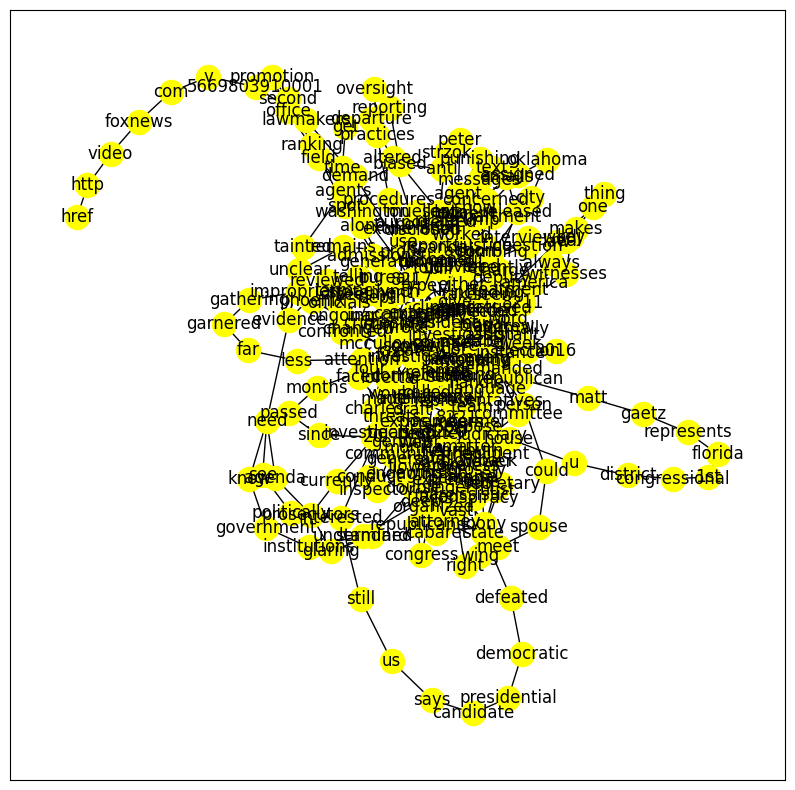


Original text:
 p ap detroit area doctor charged performing genital mutilation girls muslim sect released jail awaits trial p p judge tuesday persuaded grant bond dr jumana nagarwala supporters pledged pay 4 million flees country federal judge bernard friedman called comprehensive package p p february nagarwala allegedly performed procedure two 7 year old girls clinic livonia according court documents brought mothers p p criminal affidavit 7 year old girl told brought detroit special girls trip p p child victim also stated said go doctor get germs upon medical exam april 11 doctor determined child genitals altered removed child identified dr nagarwala doctor performed procedure p p affidavit also alleges michigan victims well p p 8220 according complaint despite oath care patients dr nagarwala alleged performed horrifying acts brutality vulnerable victims 8221 said acting assistant attorney general blanco 8220 department justice committed stopping female genital mutilation country use

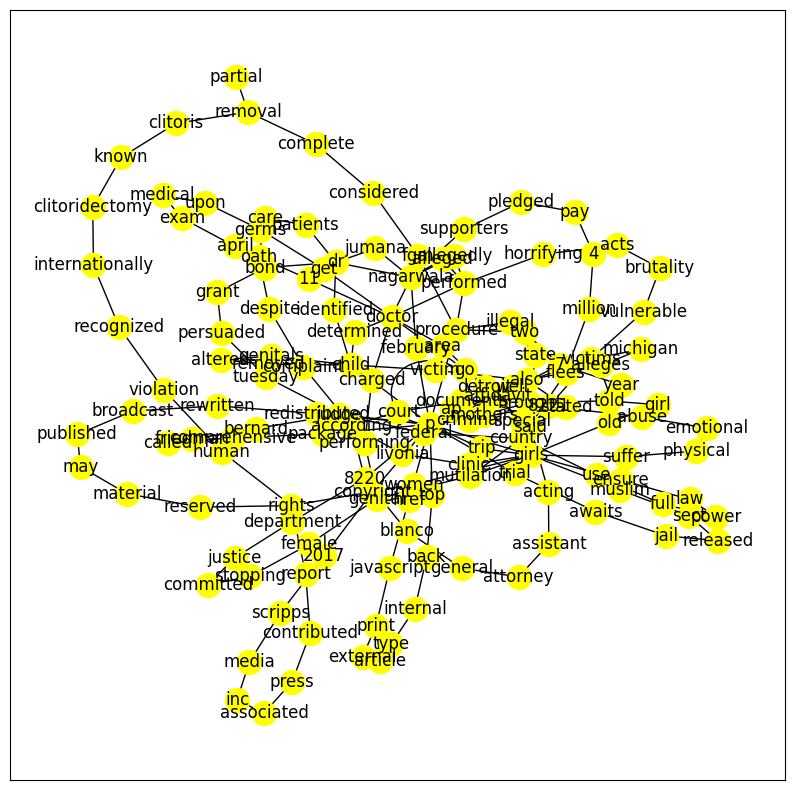


Original text:
 p charlottesville va reporter botched rolling stone article brutal gang rape university virginia willfully ignored facts statements disproved preconceived storyline school 8217 callousness toward sexual assault victims attorney former associate dean students said closing arguments tuesday p p university administrator nicole eramo seeking 7 5 million magazine portrayal 2014 story sabrina rubin erdely alleged sexual assault woman identified 8220 jackie 8221 eramo claims unfairly portrayed article trying sweep jackie 8217 sexual assault rug order protect university p p attorney tom clare argued tuesday erdely set beginning tell story 8220 institutional indifference 8221 brushed statements sources 8217 fit narrative pushed views administration onto vulnerable women interviewing p p 8220 decided article going 8217 matter facts 8221 clare said p p story jackie 8217 rape set firestorm university virginia schools nationwide prompted police launch investigation alleged assault 

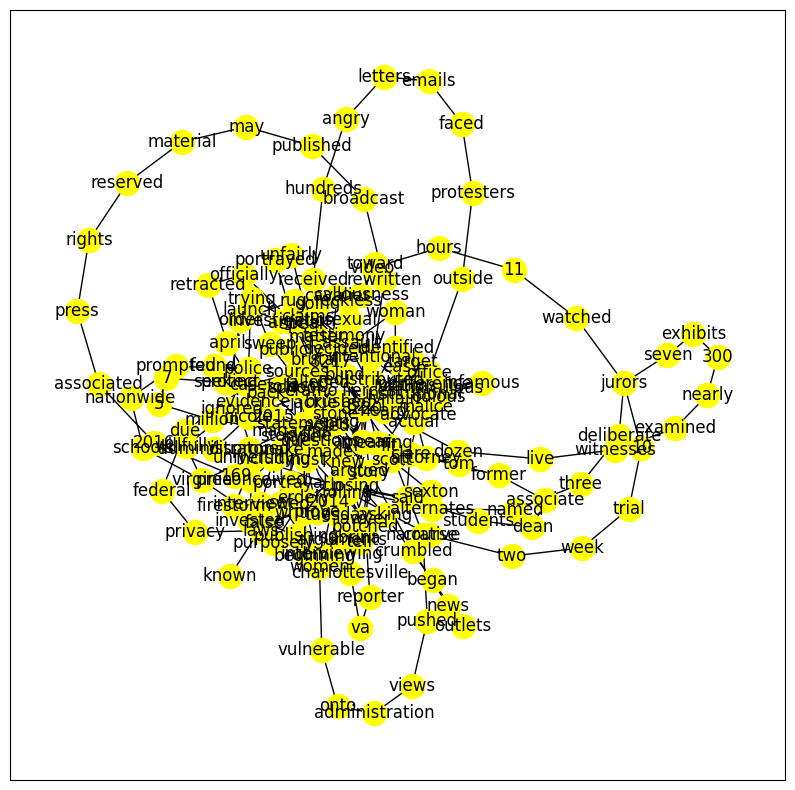


Original text:
 p steve bannon warpath continuing mission drain swamp hardly new revelation long president trump glint tea party 8217 eye breitbart news chairman hard work laying foundation would dominating force republican politics intersection conservatism libertarianism populism 8211 promoting likes sarah palin ted cruz rand paul national prominence p p former chief white house strategist href http www breitbart com big government 2017 09 26 live updates judge roy moores grassroots muscle vs luther stranges corporate money alabama gop senate runoff type external fresh stumping firebrand jurist roy moore claimed decisive victory sen luther strange 8211 swamp varmint appointed dubious circumstances fill attorney general jeff sessions 8217 vacated alabama senate seat p p bannon 8217 influence alabama blowout many wondering 8217 next populist rabble rouser cnn 8217 dana bash reports political tactician setting sights 2018 midterms crisscrossing country search populist candidates remake

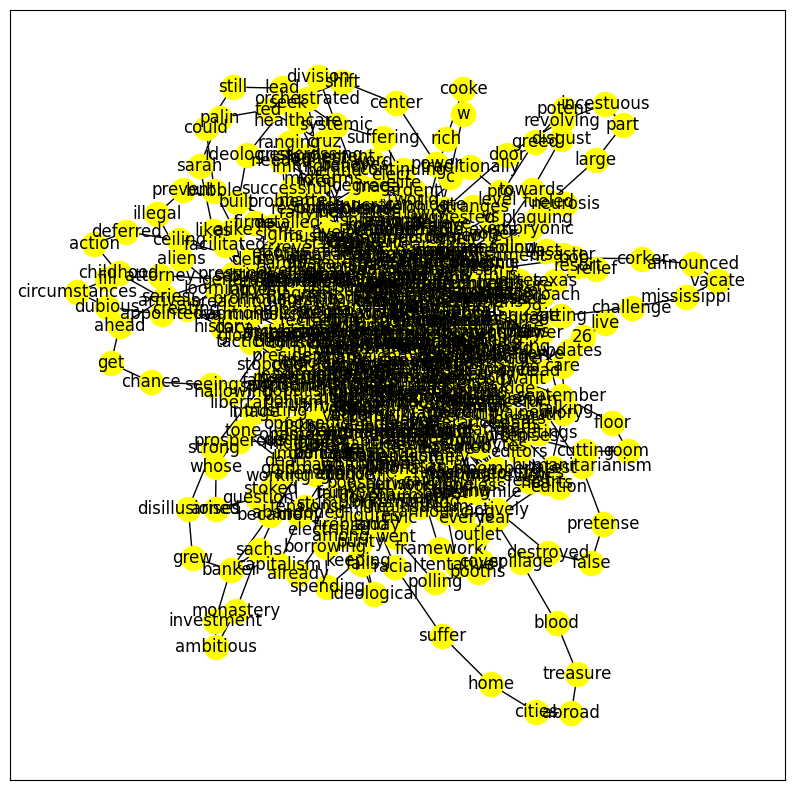

In [7]:
visualize_graph_samples("hyper",3, "soft", gtype='1.A')

Reusing dataset hyperpartisan_news_detection (/home/mbugueno/.cache/huggingface/datasets/hyperpartisan_news_detection/byarticle/1.0.0/7f4215b0474950ddf516e806400ab81d098b3da3b3a919a13cd1a4cf2c677012)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 408.68it/s]


Dataset: hyper:
Number of graphs: 516
Number of node features: 768
Number of edge features: 0
Number of classes: 2

Original text:
 p made great strides policing thought country ask href https www usatoday com story tech 2014 04 03 mozilla ceo steps 7262129 type external brendan eich one founders mozilla developers web browser firefox eich landed promotion big chair mozilla 8217 ceo lasted nine days reason back 2008 eich donated thousand dollars support proposition 8 california ballot initiative ban sex marriage unearthing donation led protests gay rights activists h href https www mediaite com online okcupid asking users boycott mozilla due browser ceos gay marriage opposition type external igh profile call boycott firefox dating site href http okcupid com type external okcupid com eich many people circumstances stricken sudden desire 8220 spend time family 8221 quietly resigned p p regardless position sex marriage activists led eich 8217 resignation ashamed basic message 8220 8217 be

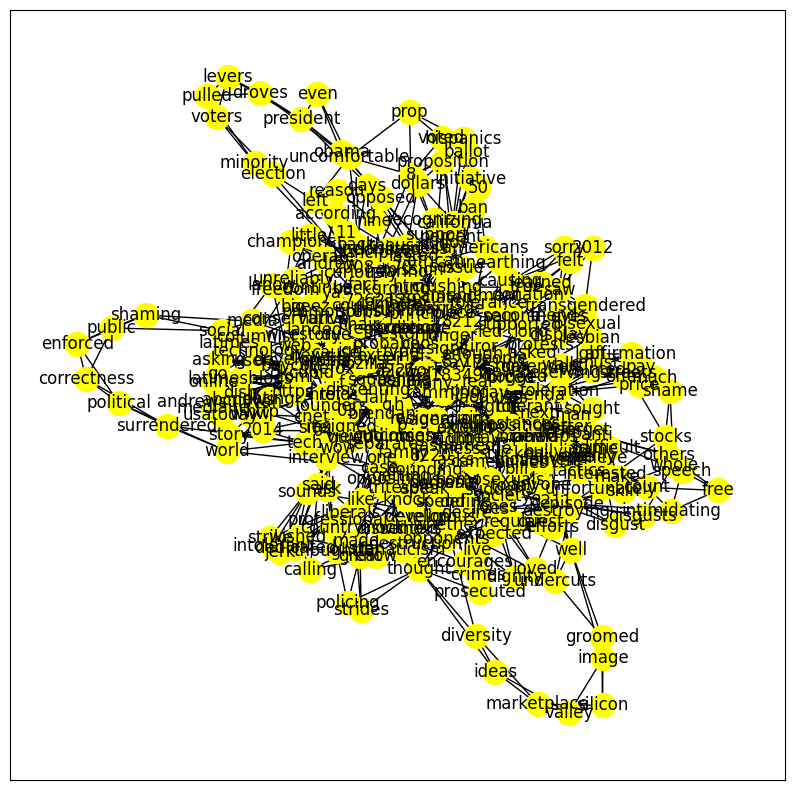


Original text:
 p photo maryhelen avalos p p sons american legion recently retired torn tattered american flag presenting new one adrea ricke globe public library manager left right j sprague sons american legion adjutant finance officer margaret smith american legion adjutant jesse horta member su samra adrea ricke library manager hector samra legion member p
Data(x=[36, 768], edge_index=[2, 181], y=[1])
Number of nodes: 36
Number of edges: 181
Average node degree: 5.03
Has isolated nodes: False
Has self-loops: True
Is undirected: True


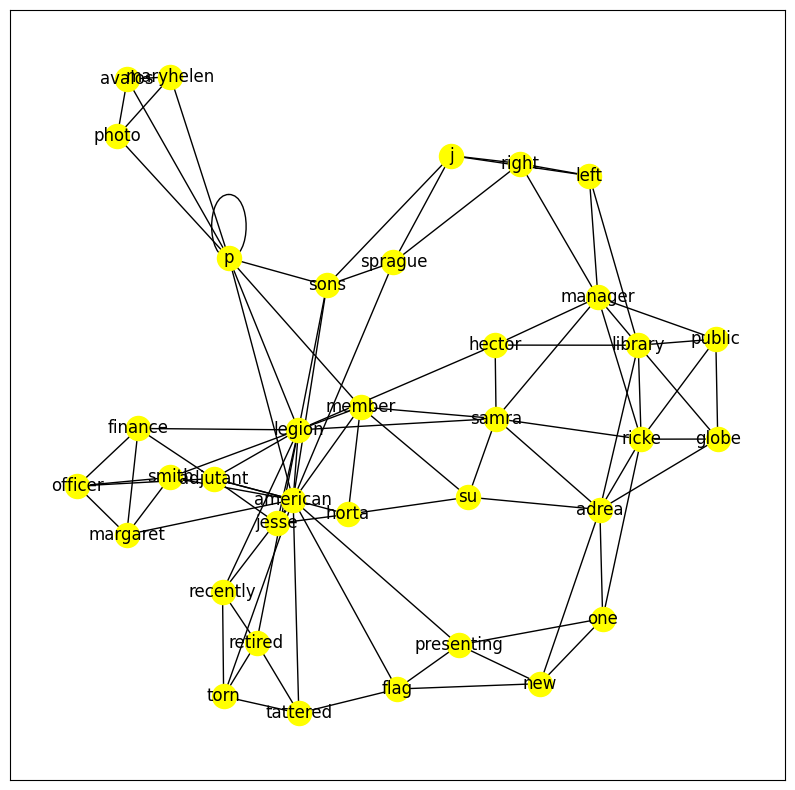


Original text:
 p href http www copyright gov fls fl102 html type external permission type internal details type internal dmca p p labor day parades bands packed muscular speeches celebrating workers finished trash getting collected parks across country conservative politicians trump revive systematic efforts weaken unions undermine workers p p trump despite populist bunting decorates speeches sustains deeply entrenched republican antipathy organized workers attack relentless p p trump budget calls href http www ishn com articles 106515 trump budget preview osha gets cut niosh gets disemboweled type external deep cuts labor department eviscerating job training programs cutting 40 percent agency research workplace safety would eliminate program funds education workers avoid workplace hazards even savages money mine safety enforcement miners trump claims love p p trump href https www nytimes com 2017 06 20 business nlrb trump labor html action click amp contentcollection economy amp mod

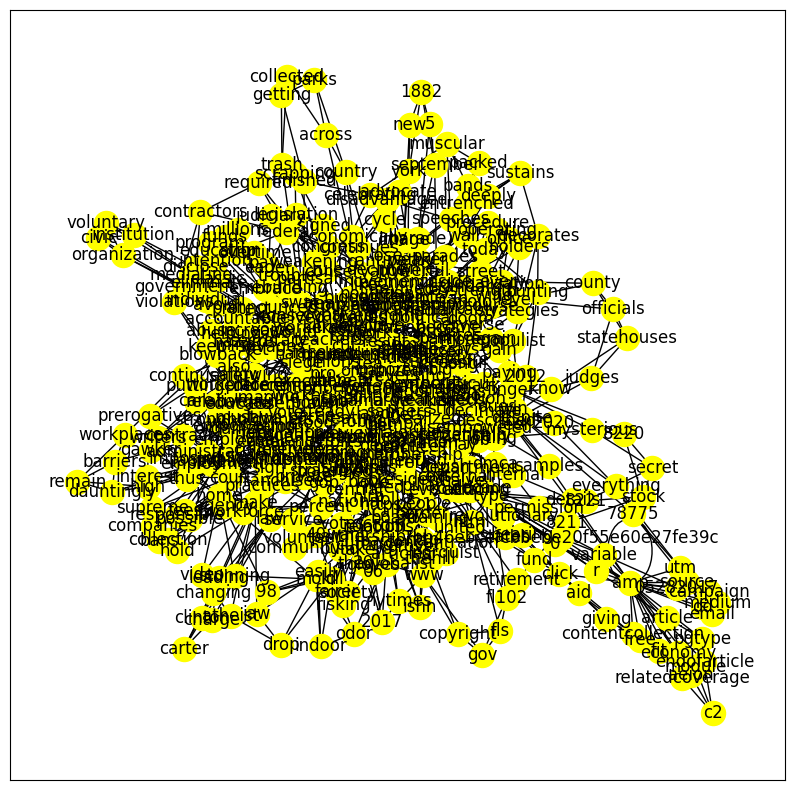

In [12]:
visualize_graph_samples("hyper",3, "soft", gtype='1.A2')

Reusing dataset hyperpartisan_news_detection (/home/mbugueno/.cache/huggingface/datasets/hyperpartisan_news_detection/byarticle/1.0.0/7f4215b0474950ddf516e806400ab81d098b3da3b3a919a13cd1a4cf2c677012)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 479.90it/s]


Dataset: hyper:
Number of graphs: 516
Number of node features: 768
Number of edge features: 1
Number of classes: 2

Original text:
 p writing article audience consisting good people like sincerely want equal democratic society unlike achieve goal look leadership prominent individuals organizations seem share goal leaders commonly identified either left progressive liberal marxist article refer prominent leaders left p p according standard wisdom left providing good leadership achieve equal democratic society problem enough people follow leadership enemies left led call ruling class remain power problem mistaken view left weak show contrary problem want equal democratic society left wrong mean p p left wrong fundamental view ordinary people wrong view ruling class able use left divide rule good people let start seeing wrong left view ordinary people p p left wrong view ordinary people p p discussing left wrong view helps say truth ordinary people truth vast majority ordinary people worl

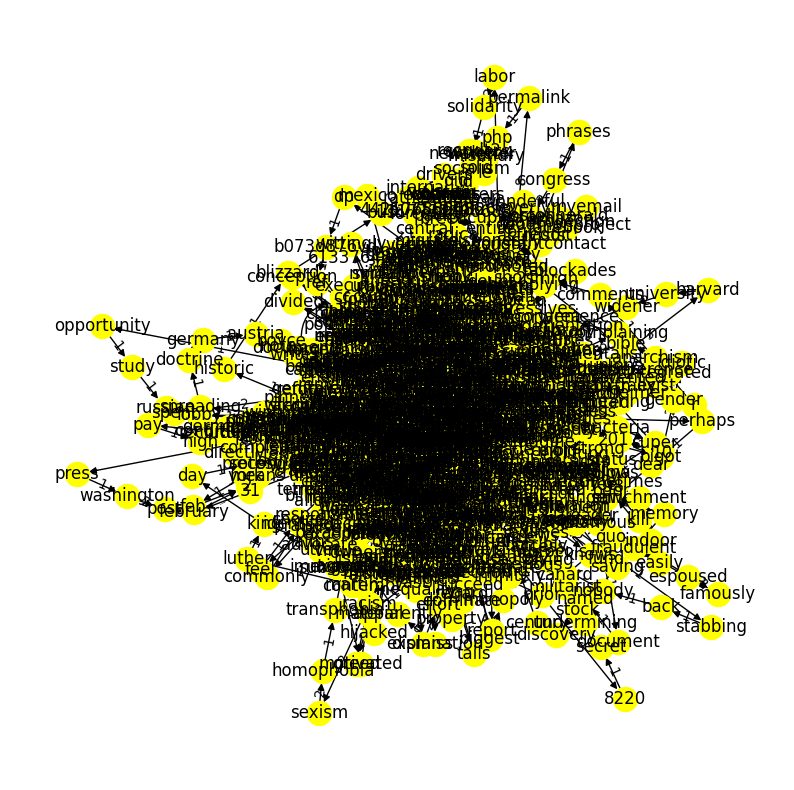


Original text:
 p killer left cryptic note table room night attack p p reports cryptic note full random numbers href http metro co uk 2017 10 06 cryptic note full numbers found las vegas shooters hotel room 6981741 type external metro reported p q p cryptic note full random numbers found las vegas shooter 8217 hotel room police say p p authorities still trying find drove stephen paddock launching worst mass shooting us history p p mystery piece paper found near dead body sheriff lombardo said 8217 sent analysis believed suicide note p p 64 year old killed 58 injured 489 opened fire people route 91 harvest festival las vegas strip sunday night investigators looking whether paddock also planned car bombing p q p investigative journalist laura loomer noticed something interesting killer targeted harvest 91 festival october 1 10 1 p numbers come 91 10 1 9 11 01 coincidence q p thinking numerology surrounding href https twitter com hashtag lasvegasshooting src hash amp ref src twsrc 205etf

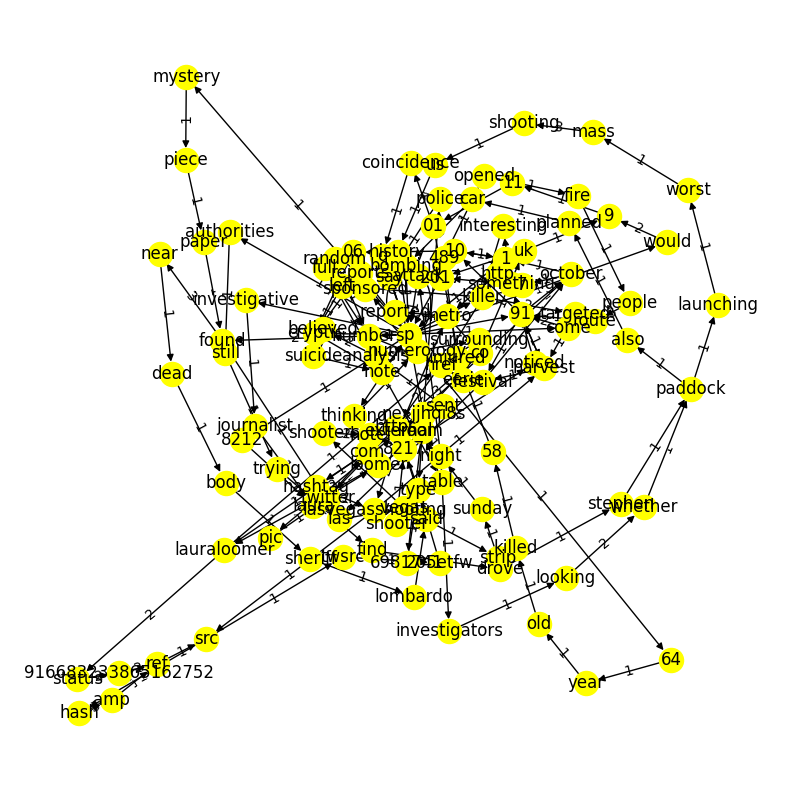


Original text:
 p type internal news p p type internal modal trigger p getty images p alex jones href http www infowars com expose rapist bill clinton win 5k type external conspiracy obsessed website infowars prompted series disruptions pro clinton rallies week offering 5 000 anyone heard shouting 8220 bill clinton rapist 8221 p p event greensboro nc tuesday night president obama bombarded protesters donned shirts slogans accusing ex president rape p p 8220 folks auditioning reality show 8221 obama joked hecklers p p 8220 get rally 8221 potus repeatedly barked 8220 8217 get rally 8217 come mess somebody else 8217 rally 8221 p p jones avid donald trump supporter offering bounty bill bashers week p p supporters since spotted hillary events miami wisconsin former president targeted appearance milwaukee saturday p p typically jovial arkansan looked visibly rattled protester shouted 8220 rapist 8221 discussion billionaire candidate 8217 position global warming p p 8220 one dispute fact 822

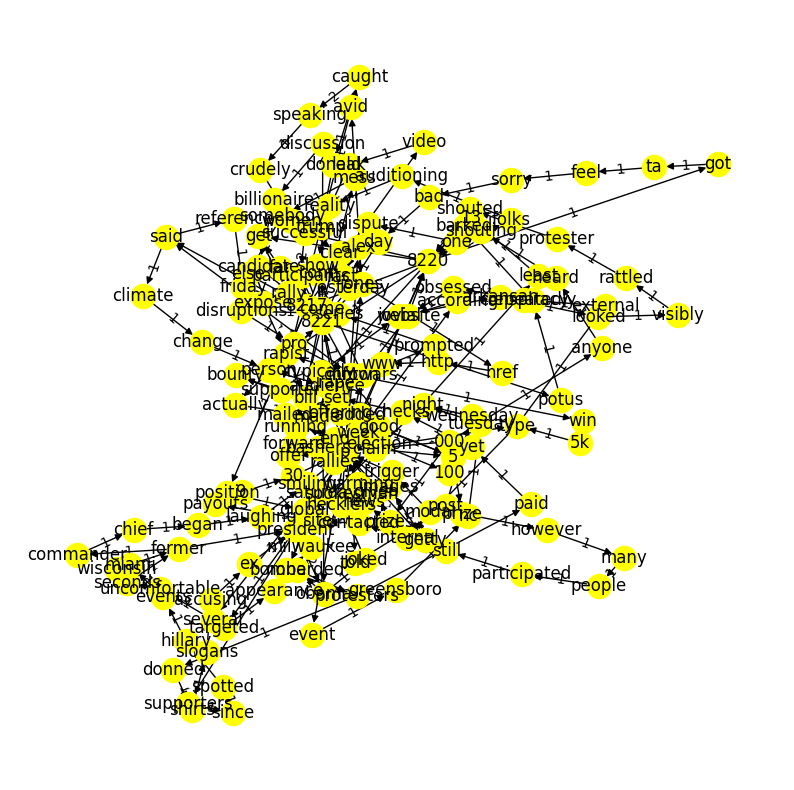

In [10]:
visualize_graph_samples("hyper",3, "soft", gtype='1.C')

Reusing dataset hyperpartisan_news_detection (/home/mbugueno/.cache/huggingface/datasets/hyperpartisan_news_detection/byarticle/1.0.0/7f4215b0474950ddf516e806400ab81d098b3da3b3a919a13cd1a4cf2c677012)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 346.46it/s]


Dataset: hyper:
Number of graphs: 516
Number of node features: 768
Number of edge features: 0
Number of classes: 2

Original text:
 p type internal donald trump finally united republican party 8211 denunciation type internal continued race based attacks u district judge gonzalo curiel presiding civil lawsuits candidate 8217 type internal trump university p p 8220 disavow comments regret comments trump made 8221 said house speaker paul ryan href http www cnn com 2016 06 07 politics paul ryan donald trump racist comment index html type external press conference tuesday 8220 claiming person 8217 job race sort like textbook definition racist comment 8230 8217 absolutely unacceptable 8221 p p type internal sen mark kirk republican illinois facing tough reelection battle year flat withdrew support party 8217 nominee saying 8220 donald trump 8217 belief american born judge mexican descent incapable fairly presiding case dead wrong un american 8221 p p last week trump charged plan build wall u

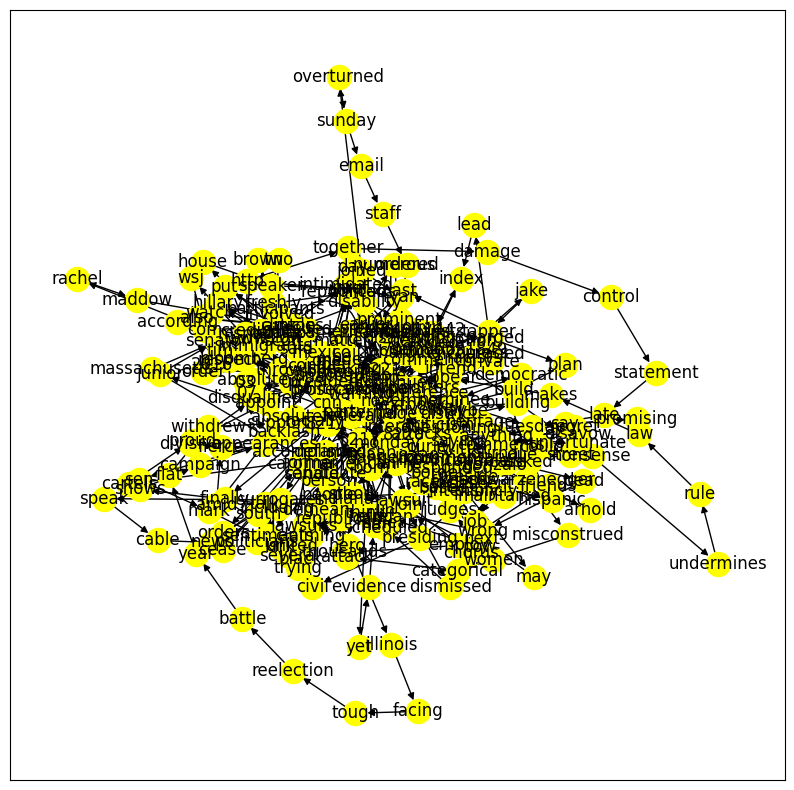


Original text:
 p oct 19 2017 3 09 pm p p washington c nfl hollywood america 8217 idols tumbling bad thing long wasted precious time money worshipping called 8220 social justice 8221 warrior hypocrites continue disappoint p p 8217 hoping disappointment lead us back really matters 8217 count p p huge swaths americans still bow altar social justice believe government forced 8220 charity 8221 advance us utopian paradise everyone enjoys outcome despite personal effort upbringing unique abilities education p p truth though social justice oxymoron based false premise cure injustice leveling playing field redistributing wealth former vice president joe biden said 8220 may call redistribution wealth 226 8364 8217 call fair 8221 p p karl marx would proud p p marx hated religion private property judeo christian values much leftists today 8217 bolt place worship combines jesus social justice government sentence p p book 8220 fatal conceit errors socialism 8221 economist friedrich hayek nails 821

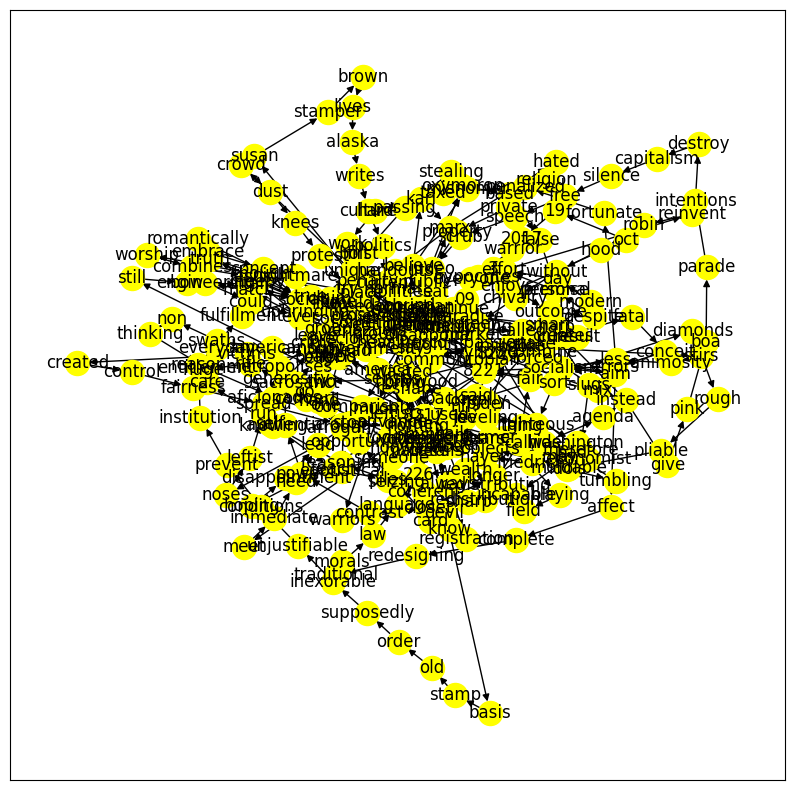


Original text:
 p sebastian gorka served seven months deputy assistant president trump alongside former chief strategist steve bannon sat circa talk time white house deep state future trump make america great agenda washington c bureaucratic swamp p p question answer sebastian gorka p q predict near future christmas probably high level personnel changes white house driven president q p sara carter lot supporters concerned departure mr steve bannon maga make america great agenda gone true p p sebastian gorka know lot people worried lot people base felt november 8th politically revolutionary moment fact steve left week later resigned always tell people relax count 10 take deep breath whether president agenda succeeds function sit steve office president supporters individuals inside white house outside lot steve critics understand celebrated resignation steve today powerful ever like scene star wars ben kenobi gets slain darth vader powerful ever imagine steve bannon powerful man outside

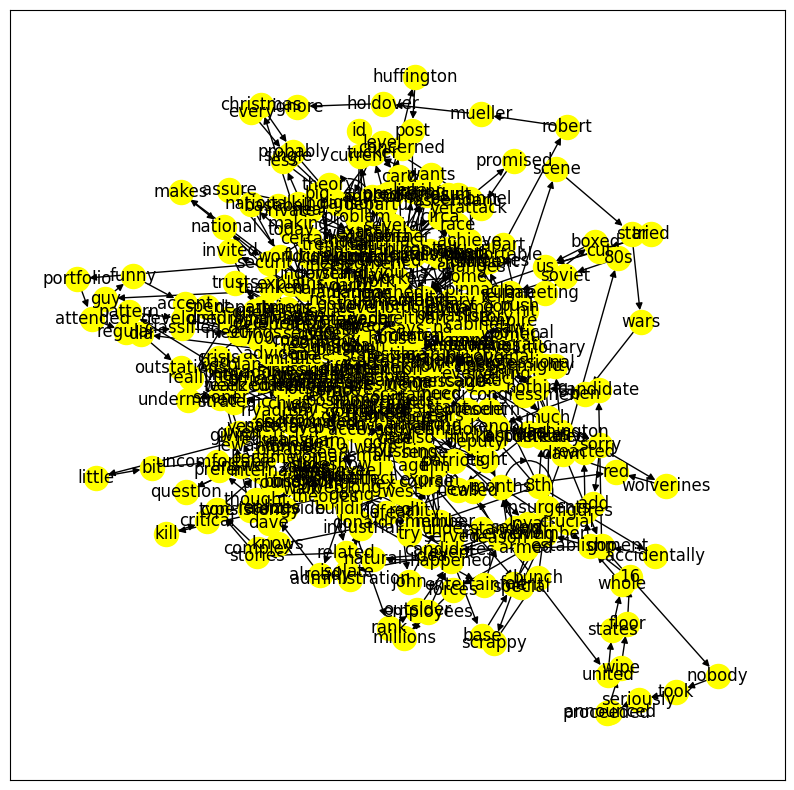

In [11]:
visualize_graph_samples("hyper",3, "soft", gtype='1.C2')